# Dean Property Consulting 2024

# Preprocessing the Dataset

## Imports

In [230]:
import pandas as pd
import polars as pl

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopy

import geopandas as gpd

In [198]:
# global variables for the visualizations
color='coral'
figsize=(7.5,7.5)
edgecolor='black'

In [2]:
# read in dataset
df=pd.read_csv('../data/230000 RE Transfers 2010-2023 PROGRESS SORTED 2.csv',low_memory=False)

In [3]:
# peek at a sample
df.sample(5)

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
31615,NaN,08/24/2021,NaN,31,Covert St,11207,"$850,000.00","31 Covert St #2, Brooklyn, 11207",#2,1,...,NaN,NaN,NaN,NaN,PropertyShark,NaN,NaN,"$18,972.00",2.87%,R6
33730,NaN,02/09/2022,NaN,467,44th St,11220,"$1,330,000.00","467 44th St, Brooklyn, 11220",NaN,2,...,NaN,NaN,NaN,NaN,PropertyShark,NaN,NaN,"$37,864.00",3.69%,R6B
21244,NaN,08/22/2018,NaN,183,Columbia Hits,11201,"$2,600,000.00",NaN,#4,1,...,NaN,NaN,NaN,NaN,PropertyShark,NaN,NaN,"$89,760.00",4.51%,"R6, LH-1"
6110,NaN,09/18/2014,NaN,82,Pioneer St,11231,"$1,300,000.00",NaN,NaN,2,...,NaN,NaN,NaN,12,PropertyShark,NaN,NaN,"$42,589.00",4.27%,NaN
33009,NaN,12/13/2021,NaN,9008,Fort Hamilton Pkwy,11209,"$1,350,000.00","9008 Ft Hamilton Pkwy, Brooklyn, 11209",NaN,2,...,NaN,NaN,NaN,NaN,PropertyShark,NaN,NaN,"$32,677.00",3.12%,"R5B, BR"


## Preprocessing

In [4]:
df.tail(10)

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
40681,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$690,000.00","1670 73rd St, Brooklyn, 11204",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$35,871.00",6.95%,R5
40682,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$850,000.00","7415 Tenth Ave #1C, Brooklyn, 11228",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$44,189.00",6.95%,R5B
40683,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$1,120,000.00","168 Bleecker St, Brooklyn, 11221",NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$58,225.00",6.95%,R6
40684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN
40690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.00,NaN,NaN


In [5]:
# remove the bottom 7 rows as they're blank data
df=df[:-7]
df.tail()

,Unnamed: 0,DATE,NEIGBORHOOD,No.,STREET,ZIP,SALE / ASK,WEB,RENT ROLL,UNITS,...,TAX,BEDS,BATHS,WEEKS,TELEPHONE,CONTACT,AGENCY,ANNUAL $,30yr,ZONING
40679,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$470,000.00","752 Rutland Rd, Brooklyn, 11203",NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$24,434.00",6.95%,R6
40680,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$2,220,000.00","722 Chauncey St, Brooklyn, 11207",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$115,411.00",6.95%,R6
40681,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$690,000.00","1670 73rd St, Brooklyn, 11204",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$35,871.00",6.95%,R5
40682,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$850,000.00","7415 Tenth Ave #1C, Brooklyn, 11228",NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$44,189.00",6.95%,R5B
40683,NaN,12/14/2023,NaN,NaN,NaN,NaN,"$1,120,000.00","168 Bleecker St, Brooklyn, 11221",NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$58,225.00",6.95%,R6


In [6]:
# check information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40684 entries, 0 to 40683
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   187 non-null    object 
 1   DATE         40684 non-null  object 
 2   NEIGBORHOOD  1753 non-null   object 
 3   No.          33735 non-null  object 
 4   STREET       33735 non-null  object 
 5   ZIP          33405 non-null  object 
 6   SALE / ASK   40682 non-null  object 
 7   WEB          17352 non-null  object 
 8   RENT ROLL    7548 non-null   object 
 9   UNITS        40656 non-null  object 
 10  FLOORS       40675 non-null  object 
 11  LEGAL        39920 non-null  object 
 12  STRUCTURE    20986 non-null  object 
 13  C            927 non-null    object 
 14  LOT 1        28936 non-null  object 
 15  LOT 2        34403 non-null  object 
 16  SF           40670 non-null  object 
 17  $/SF         39776 non-null  object 
 18  SF/FLOOR     39619 non-null  object 
 19  $/FL

Convert some columns to appropriate data types.

In [7]:
# convert date column to correct format
df['DATE']=pd.to_datetime(df['DATE'])

# SALE / ASK column
# remove dollar symbol 
# convert to number data type
df['SALE / ASK']=df['SALE / ASK'].str.replace(r'[\$,]', '', regex=True)
df['SALE / ASK']=df['SALE / ASK'].astype('float64')

# recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40684 entries, 0 to 40683
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   187 non-null    object        
 1   DATE         40684 non-null  datetime64[ns]
 2   NEIGBORHOOD  1753 non-null   object        
 3   No.          33735 non-null  object        
 4   STREET       33735 non-null  object        
 5   ZIP          33405 non-null  object        
 6   SALE / ASK   40682 non-null  float64       
 7   WEB          17352 non-null  object        
 8   RENT ROLL    7548 non-null   object        
 9   UNITS        40656 non-null  object        
 10  FLOORS       40675 non-null  object        
 11  LEGAL        39920 non-null  object        
 12  STRUCTURE    20986 non-null  object        
 13  C            927 non-null    object        
 14  LOT 1        28936 non-null  object        
 15  LOT 2        34403 non-null  object        
 16  SF  

In [29]:
def nullish(df,ordered=True):
    '''
    Creates a summary dataframe showing the amount of null
    values in each column along with the percent of nulls
    compared to the total rows in the dataframe
    
    Inputs:
    - df
    a dataframe
    
    Outputs:
    a new dataframe with the summary of nulls and percentages
    '''
    
#     Define columns in new nullish dataframe

    # number of non-nulls in each original column
    list_nonnulls=[df[col].notna().sum() for col in df.columns]

    # number of nulls in each original column
    list_nulls=[df[col].isna().sum() for col in df.columns]

    
#    Create new dataframe

    df_nullish=pd.DataFrame({'col_name':df.columns,
                            'num_nulls':list_nulls,
                            'num_non_nulls':list_nonnulls})

    
#    Add new column with percent null

    df_nullish['percent_null'] = round((df_nullish['num_nulls'] / (df.shape[0]))*100,2)
    
    if not ordered:
        return df_nullish
    else: 
        df_nullish.sort_values(by='percent_null',inplace=True)
        return df_nullish


In [30]:
nullish(df)

,col_name,num_nulls,num_non_nulls,percent_null
1,DATE,0,40684,0.00
6,SALE / ASK,2,40682,0.00
10,FLOORS,9,40675,0.02
16,SF,14,40670,0.03
9,UNITS,28,40656,0.07
28,ANNUAL $,82,40602,0.20
29,30yr,325,40359,0.80
19,$/FLOOR,565,40119,1.39
11,LEGAL,764,39920,1.88
17,$/SF,908,39776,2.23


### Imputing ZIP Codes

Some rows have very few null values. Others have much more. I'm interested in adding latitude and longitude to the house sales, but the relevant columns have about 17% null values.

In [205]:
df_geo=df[['No.','STREET','ZIP']]
df_geo.sample(5)

,No.,STREET,ZIP
200,275,12th St,NaN
39407,NaN,NaN,NaN
15945,1738,74th St,11204
35255,NaN,NaN,NaN
34509,NaN,NaN,NaN


In theory, I should be able to impute the correct zip codes.

In [206]:
# Streets with missing ZIP codes

df_geo_na_zip=df_geo[df_geo['ZIP'].isna()]
df_geo_na_zip['STREET'].value_counts()

STREET
Bergen St          8
Lefferts Pl        8
Hall St            7
Lafayette Ave      7
Sixth Ave          6
                  ..
56th St            1
East Seventh St    1
Jefferson Ave      1
Garfield Pl        1
East 24th St       1
Name: count, Length: 158, dtype: int64

#### Plotting all zip codes in New York City

<Axes: >

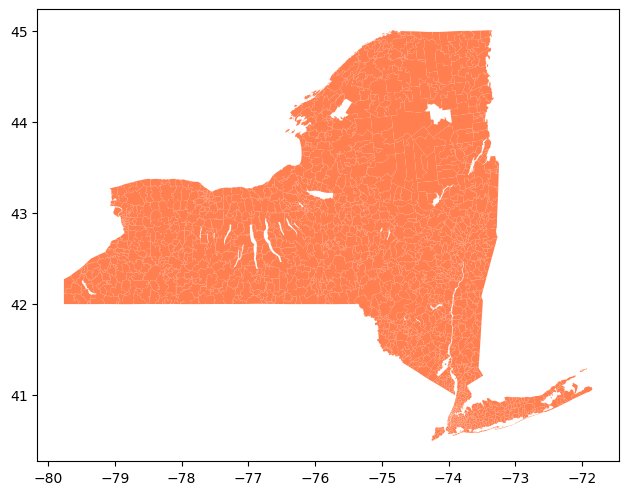

In [207]:
# read in (geo)json file
zips=gpd.read_file('../data/ny_new_york_zip_codes_geo.min.json')

# quickly plot the whole dataset (New York State)
zips.plot(figsize=figsize,color=color,edgecolor='none')

According to [bklyndesigns.com](https://bklyndesigns.com/new-york-city-zip-code/), these are the following zip codes for New York City:
* **Manhattan**: 10001-10282
* **Staten Island**: 10301-10314
* **Bronx**: 10451-10475
* **Queens**: 11004-11109, 11351-11697
* **Brooklyn**: 11201-11256

In [208]:
zips.sample(5)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
366,36,11420,3611420,B5,G6350,S,5382008,0,+40.6735844,-073.8177332,N,"POLYGON ((-73.80826 40.68696, -73.80786 40.687..."
685,36,14775,3614775,B5,G6350,S,139959428,5652519,+42.2287533,-079.6999330,N,"POLYGON ((-79.76176 42.16796, -79.76179 42.173..."
243,36,14825,3614825,B5,G6350,S,43694812,10603,+42.0562963,-076.6181867,N,"POLYGON ((-76.62745 42.00802, -76.62727 42.008..."
167,36,12973,3612973,B5,G6350,S,92427930,3114229,+44.2876768,-074.5947059,N,"POLYGON ((-74.55030 44.33289, -74.54976 44.329..."
882,36,13801,3613801,B5,G6350,S,177555383,1340825,+42.5050845,-075.7769695,N,"POLYGON ((-75.80655 42.58176, -75.80669 42.582..."


In [209]:
zips.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   1794 non-null   object  
 1   ZCTA5CE10   1794 non-null   object  
 2   GEOID10     1794 non-null   object  
 3   CLASSFP10   1794 non-null   object  
 4   MTFCC10     1794 non-null   object  
 5   FUNCSTAT10  1794 non-null   object  
 6   ALAND10     1794 non-null   int64   
 7   AWATER10    1794 non-null   int64   
 8   INTPTLAT10  1794 non-null   object  
 9   INTPTLON10  1794 non-null   object  
 10  PARTFLG10   1794 non-null   object  
 11  geometry    1794 non-null   geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 168.3+ KB


In [210]:
# convert zip code column to integers
zips['ZCTA5CE10']=[int(zip_) for zip_ in zips['ZCTA5CE10']]

In [211]:
# zip code column within geodataframe
state_zips=zips['ZCTA5CE10']
state_zips

0       12205
1       12009
2       14804
3       14836
4       14536
        ...  
1789    10503
1790    10535
1791    14569
1792    14478
1793    14415
Name: ZCTA5CE10, Length: 1794, dtype: int64

In [212]:
# setup bounds for each borough
# # manhattan
man_low=10001
man_high=10282

# # staten island
sta_low=10301
sta_high=10314

# # bronx
brx_low=10451
brx_high=10475

# # queens_1
que_1low=11004
que_1high=11109

# # queens_2
que_2low=11351
que_2high=11697

# # brooklyn
bro_low=11201
bro_high=11256

In [213]:
# list comprehension to isolate each borough
# # manhattan
man_zips=[zip_ for zip_ in state_zips if man_low <= zip_ <= man_high]
sta_zips=[zip_ for zip_ in state_zips if sta_low <= zip_ <= sta_high]
brx_zips=[zip_ for zip_ in state_zips if brx_low <= zip_ <= brx_high]
que_zips1=[zip_ for zip_ in state_zips if que_1low <= zip_ <= que_1high]
que_zips2=[zip_ for zip_ in state_zips if que_2low <= zip_ <= que_2high]
bro_zips=[zip_ for zip_ in state_zips if bro_low <= zip_ <= bro_high]

# combine the lists
nyc_zip_list=man_zips+sta_zips+brx_zips+que_zips1+que_zips2+bro_zips
len(nyc_zip_list)

261

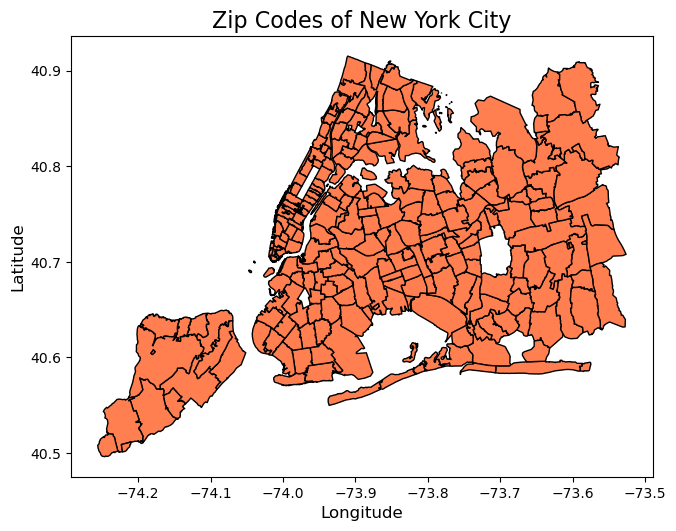

In [222]:
# let's see New York City!

nyc_zips=zips[zips['ZCTA5CE10'].isin(nyc_zip_list)]

ax=nyc_zips.plot(figsize=figsize,color=color,edgecolor='black')

plt.title('Zip Codes of New York City', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()

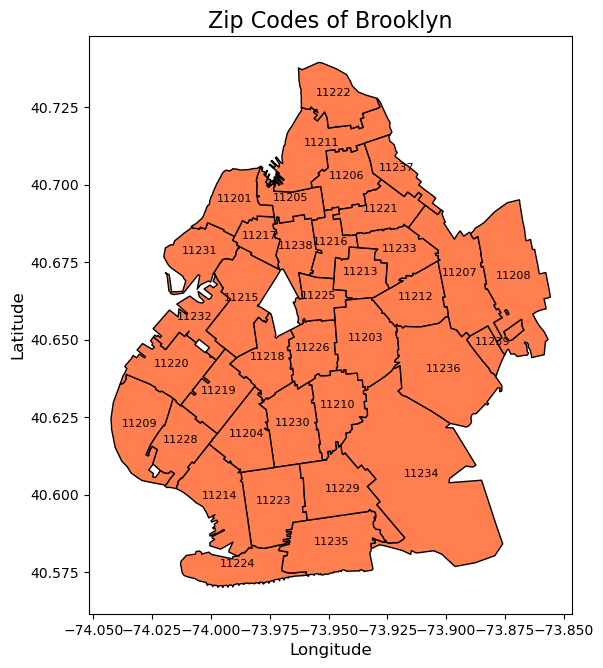

In [226]:
# now let's see Brooklyn

bro_zips_map=zips[zips['ZCTA5CE10'].isin(bro_zips)]

ax = bro_zips_map.plot(figsize=(7.5,7.5),color='coral',edgecolor='black')

# add labels corresponding to zipcode column
for idx, row in bro_zips_map.iterrows():
    ax.annotate(text=row['ZCTA5CE10'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), ha='center', fontsize=8)

plt.title('Zip Codes of Brooklyn', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.savefig('../figs/zip_code_bk.png', format='png')

# show the plot
plt.show()

In [259]:
type(bro_zips_map)

geopandas.geodataframe.GeoDataFrame

#### Adding geographic data to the real estate database's zip codes

I am trying to find a dataset that includes street names, zip codes, and geographic points, so that I don't have to impute the data. Let's try a dataset from NYC's [NYC Open Data](https://data.cityofnewyork.us/City-Government/Digital-City-Map-Shapefile/m2vu-mgzw). This may have a list of street names and their location, which would make imputing the zip codes a little easier.

In [245]:
# read in geojson file
streets_nyc=gpd.read_file('../data/DigitalCityMapShapefile.geojson')

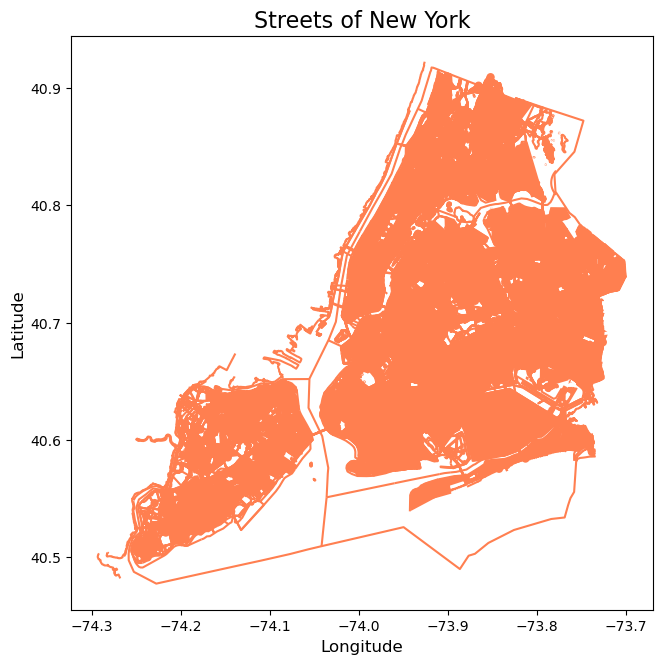

In [246]:
# plot the whole dataset
ax=streets_nyc.plot(figsize=figsize,color=color,edgecolor='none')

plt.title('Streets of New York', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.savefig('../figs/streets_nyc.png', format='png')

# show the plot
plt.show()

In [247]:
streets_nyc.sample(5)

,ll_type,intro_num,ll_limits,intro_month,amend_dt,limits_er,intro_day,map_cabine,paper_st,repeal_dt,...,borough,stair_st,record_st,feat_type,street_nm,track_num,scanned,altmappdf,cert_date,geometry
99426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bronx,NaN,NA,Infrastructure,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-73.83683 40.81481, -73.8368..."
9950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Manhattan,NaN,NaN,Mapped_St,1 Avenue,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-73.97805 40.73755, -73.9776..."
31727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,...,Queens,NaN,NaN,Mapped_St,Yellowstone Boulevard,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-73.85216 40.73295, -73.8518..."
22420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Staten Island,NaN,NaN,Mapped_St,Amboy Road,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-74.14117 40.55356, -74.1412..."
129327,Honorary,0281,the intersection of Madison Street and Gouvern...,3,NaN,NaN,10,NaN,NaN,NaN,...,Manhattan,NaN,NaN,Intersection name,NaN,NaN,NaN,NaN,NaN,POINT (-73.98388 40.71320)


In [248]:
streets_nyc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 130260 entries, 0 to 130259
Data columns (total 60 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ll_type      2292 non-null    object        
 1   intro_num    2297 non-null    object        
 2   ll_limits    2300 non-null    object        
 3   intro_month  2301 non-null    object        
 4   amend_dt     8 non-null       object        
 5   limits_er    70 non-null      object        
 6   intro_day    2301 non-null    object        
 7   map_cabine   4520 non-null    object        
 8   paper_st     14821 non-null   object        
 9   repeal_dt    131 non-null     object        
 10  amendt_txt   8 non-null       object        
 11  official_nm  2285 non-null    object        
 12  old_name     2295 non-null    object        
 13  amdyrllsec   8 non-null       object        
 14  amended      2201 non-null    object        
 15  honor_name   2295 non-null

In [249]:
nullish(streets_nyc)

# There are so many null values in this dataset! That's terrible.

,col_name,num_nulls,num_non_nulls,percent_null
59,geometry,0,130260,0.00
50,borough,5361,124899,4.12
53,feat_type,6047,124213,4.64
20,edit_date,62305,67955,47.83
52,record_st,73099,57161,56.12
30,route_type,75466,54794,57.93
54,street_nm,76206,54054,58.50
31,feat_statu,76206,54054,58.50
28,streetwidt,76206,54054,58.50
23,build_stat,76206,54054,58.50


There's a borough column, so we can slice the dataset to only include streets that are marked as being in Brooklyn.

In [254]:
# filter for Brooklyn
streets_bk = streets_nyc[streets_nyc['borough'] == 'Brooklyn']

# Show the filtered DataFrame
streets_bk.sample(5)

,ll_type,intro_num,ll_limits,intro_month,amend_dt,limits_er,intro_day,map_cabine,paper_st,repeal_dt,...,borough,stair_st,record_st,feat_type,street_nm,track_num,scanned,altmappdf,cert_date,geometry
95058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brooklyn,NaN,NA,Infrastructure,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-73.89895 40.60359, -73.8988..."
96956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brooklyn,NaN,NaN,Infrastructure,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-73.96008 40.70331, -73.9601..."
88008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brooklyn,NaN,No,Mapped_St,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-73.93829 40.58620, -73.9389..."
51948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brooklyn,NaN,NaN,Mapped_St,Hemlock Street,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-73.87119 40.68393, -73.8713..."
92447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brooklyn,NaN,NA,Infrastructure,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-74.01927 40.62432, -74.0192..."


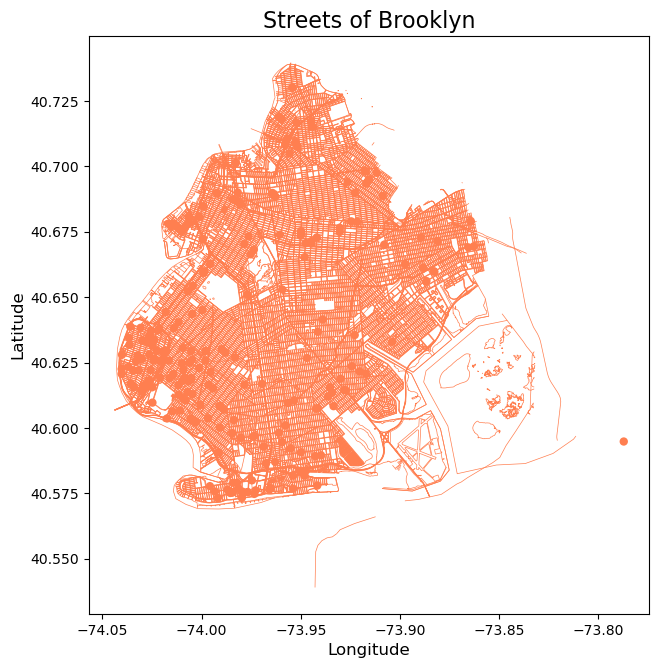

In [257]:
# plot the whole dataset
ax=streets_bk.plot(figsize=figsize,color=color,edgecolor='none',linewidth=0.5)

plt.title('Streets of Brooklyn', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.savefig('../figs/streets_bk.png', format='png')

# show the plot
plt.show()

It looks like the `geodataframe` has has mixed types. Let's investigate this.

/var/folders/n3/q8wb235x57n_sx2q14dsngjr0000gn/T/ipykernel_20970/1473432101.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  test_streets=streets_bk.explode()


<Axes: >

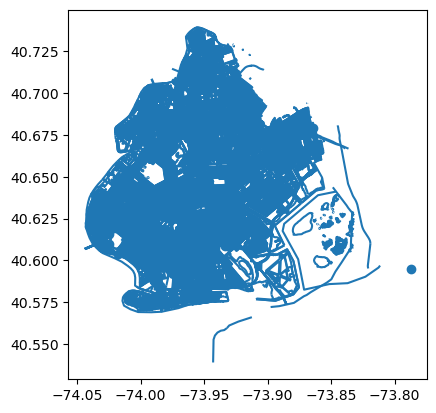

In [274]:
# we can `explode` the gdf to remove multipolygons 
test_streets=streets_bk.explode()
test_streets.plot()

/var/folders/n3/q8wb235x57n_sx2q14dsngjr0000gn/T/ipykernel_20970/2314370100.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  test_zips_bk=bro_zips_map.explode()


<Axes: >

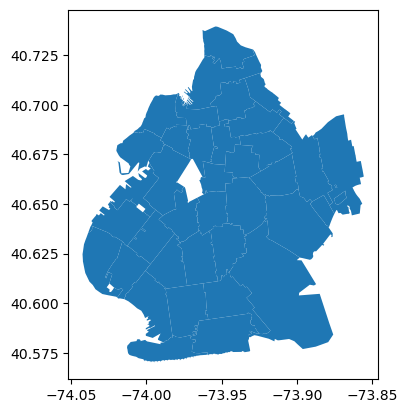

In [279]:
test_zips_bk=bro_zips_map.explode()
test_zips_bk.plot()

In [281]:
print(test_streets.shape)
print(streets_bk.shape)
print(test_zips_bk.shape)
print(bro_zips_map.shape)

(34021, 60)
(33794, 60)
(40, 12)
(37, 12)


In [282]:
testing_overlay=gpd.overlay(test_zips_bk,test_streets,how='intersection')
testing_overlay.plot()

NotImplementedError: df2 contains mixed geometry types.

In [287]:
test_streets['geometry'].geom_type.value_counts()

LineString    33770
Point           237
Polygon          14
Name: count, dtype: int64

# I don't see a zip code column, but what I can do instead is perform an overlap function between the zip code map and the street map.

In [262]:
# geopandas.overlay(df1, df2, how='intersection', keep_geom_type=None, make_valid=True)
bk_streets=gpd.overlay(bro_zips_map,streets_bk,how='intersection')
bk_streets.plot()

NotImplementedError: df2 contains mixed geometry types.

In [9]:
# create reduced column list 
low_null_columns=[col for col in df.columns if df[col].isnull().sum()<100]
low_null_columns

['DATE', 'SALE / ASK', 'UNITS', 'FLOORS', 'SF', 'ANNUAL $']

In [10]:
# make new dataset with low-null columns
df_lownull=df[low_null_columns].copy()
df_lownull

,DATE,SALE / ASK,UNITS,FLOORS,SF,ANNUAL $
0,2010-01-03,770000.0,1,2.5,"2,722","$36,033.00"
1,2010-01-06,1397478.0,2,3,"3,780","$63,202.00"
2,2010-01-10,505000.0,1,1,800,"$30,089.00"
3,2010-01-11,450000.0,1,1,650,"$31,473.00"
4,2010-01-11,1530000.0,3,3,"3,200","$69,400.00"
...,...,...,...,...,...,...
40679,2023-12-14,470000.0,2,2,"1,966","$24,434.00"
40680,2023-12-14,2220000.0,1,2,"1,872","$115,411.00"
40681,2023-12-14,690000.0,1,2,986,"$35,871.00"
40682,2023-12-14,850000.0,1,3,"1,660","$44,189.00"


In [11]:
# ANNUAL $ column
# remove dollar symbol 
# convert to number data type
df_lownull['ANNUAL $']=df_lownull['ANNUAL $'].str.replace(r'[\$,]', '', regex=True).astype('float64')

# check
print(df_lownull['ANNUAL $'].sample(3))

2831     42569.0
27837    16779.0
9452     68565.0
Name: ANNUAL $, dtype: float64


In [12]:
df_lownull['SF'].value_counts()

SF
0          892
2,400      566
2,700      493
3,000      489
3,600      427
          ... 
$908.00      1
5,046        1
6,883        1
1,513        1
38,792       1
Name: count, Length: 5229, dtype: int64

In [13]:
# SF column
# remove comma symbol 
# convert to number data type
df_lownull['SF']=df_lownull['SF'].str.replace(",|\s|[^a-z]",'').astype('float64')

# check
print(df_lownull['SF'].sample(3))

ValueError: could not convert string to float: '2,722'

In [14]:
df_lownull.isnull().sum()

DATE           0
SALE / ASK     2
UNITS         28
FLOORS         9
SF            14
ANNUAL $      82
dtype: int64

In [16]:
for col in df_lownull.columns:
    print(f'The percentage of nulls for column {col} is:')
    print(f'{(df_lownull[col].isnull().sum())/(df_lownull.shape[0])*100}\n')

The percentage of nulls for column DATE is:
0.0

The percentage of nulls for column SALE / ASK is:
0.004915937469275391

The percentage of nulls for column UNITS is:
0.06882312456985547

The percentage of nulls for column FLOORS is:
0.02212171861173926

The percentage of nulls for column SF is:
0.034411562284927734

The percentage of nulls for column ANNUAL $ is:
0.20155343624029104



We will drop the null values in this subset dataframe as there are very few null rows relative to the entire dataframe.

In [17]:
df_lownull=df_lownull.dropna()
df_lownull.head()

,DATE,SALE / ASK,UNITS,FLOORS,SF,ANNUAL $
0,2010-01-03,770000.0,1,2.5,"2,722",36033.0
1,2010-01-06,1397478.0,2,3,"3,780",63202.0
2,2010-01-10,505000.0,1,1,800,30089.0
3,2010-01-11,450000.0,1,1,650,31473.0
4,2010-01-11,1530000.0,3,3,"3,200",69400.0
